<a href="https://colab.research.google.com/github/tejaswini8213/Perception-Lab/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

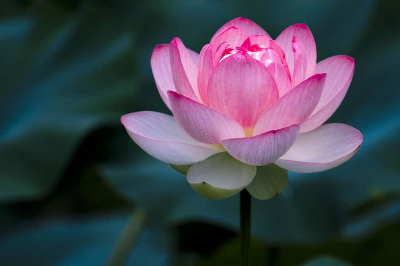

In [13]:
img = cv2.imread('image.jpg')
(h, w) = img.shape[:2]
new_width = 400
aspect_ratio = h / w
new_height = int(new_width * aspect_ratio)
image = cv2.resize(img, (new_width, new_height))
cv2_imshow(image)

# K - MEANS

In [14]:
if image is None:
    raise ValueError("Image not found or unable to load. Ensure the image is uploaded to Colab.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [17]:
# Function for K-Means segmentation
def kmeans_segmentation(image, k=5):
    # Flatten the image into a 2D array (each row is a pixel with 3 color channels)
    flat_image = image.reshape((-1, 3))

    # Define the criteria for K-Means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    # Apply K-Means clustering
    _, labels, centers = cv2.kmeans(
        flat_image.astype(np.float32), k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
    )

    # Convert cluster centers back to uint8 (color values)
    centers = np.uint8(centers)

    # Map each pixel to its corresponding cluster center
    segmented_image = centers[labels.flatten()].reshape(image.shape)

    return segmented_image

# Perform K-Means segmentation with 5 clusters
kmeans_result = kmeans_segmentation(image, k=13)


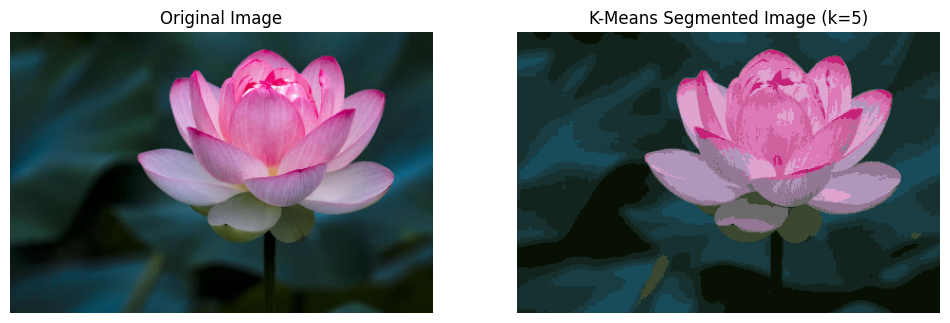

In [18]:
# Display the original and segmented images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

# K-Means Segmented Image
plt.subplot(1, 2, 2)
plt.title('K-Means Segmented Image (k=5)')
plt.imshow(kmeans_result)
plt.axis('off')

plt.show()

# MEAN SHIFT

In [22]:
from sklearn.cluster import MeanShift, estimate_bandwidth
def mean_shift_segmentation(image):
    # Flatten the image into a 2D array (each row is a pixel with 3 color channels)
    flat_image = image.reshape((-1, 3))

    # Estimate the bandwidth for MeanShift (adjust quantile and samples as needed)
    bandwidth = estimate_bandwidth(flat_image, quantile=0.5, n_samples=100)

    # Apply MeanShift clustering
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(flat_image)

    # Get the labels and cluster centers
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    # Recreate the segmented image using the cluster centers
    segmented_image = cluster_centers[labels.flatten()].reshape(image.shape)

    return segmented_image.astype(np.uint8)

# Perform Mean Shift segmentation
mean_shift_result = mean_shift_segmentation(image)

Summary of Effects:
1.   Quantile:
*   High Quantile: Smoother, less detailed, larger segments.
*   Low Quantile: More detailed, finer segments, but may lead to over-segmentation.

2. n_samples:
*   High n_samples: More accurate bandwidth estimation, better segmentation, but slower.
* Low n_samples: Faster processing, but potentially less accurate and poorer segmentation.

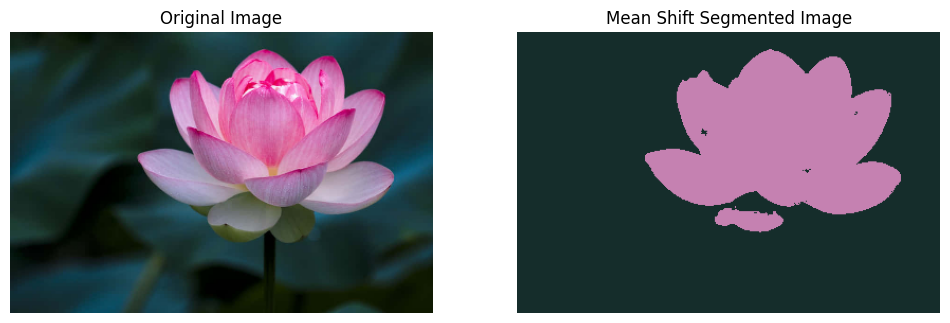

In [23]:
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

# Mean Shift Segmented Image
plt.subplot(1, 2, 2)
plt.title('Mean Shift Segmented Image')
plt.imshow(mean_shift_result)
plt.axis('off')

plt.show()

# GRAPH BASED

In [26]:
from skimage.segmentation import felzenszwalb

# Check if the image is loaded
if image is None:
    raise ValueError("Image not found or unable to load. Ensure the image is uploaded to Colab.")

# Convert BGR to RGB for visualization
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function for Graph-Based Segmentation using Felzenszwalb
def graph_based_segmentation(image, scale=100, sigma=0.5, min_size=50):
    # Apply Felzenszwalb segmentation
    segments = felzenszwalb(image, scale=scale, sigma=sigma, min_size=min_size)

    # Create an empty segmented image
    segmented_image = np.zeros_like(image)

    # Assign random colors to each segment
    for i in range(np.max(segments) + 1):
        mask = segments == i
        color = np.random.randint(0, 255, size=3)
        segmented_image[mask] = color

    return segmented_image

# Perform Graph-Based Segmentation
graph_based_result = graph_based_segmentation(image)


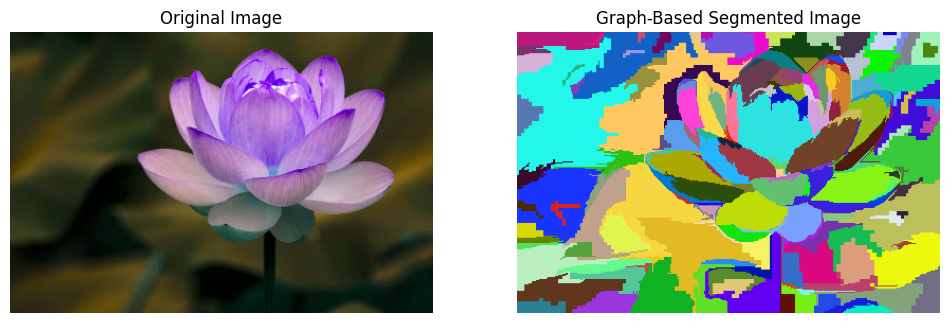

In [27]:
# Display the original and segmented images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

# Graph-Based Segmented Image
plt.subplot(1, 2, 2)
plt.title('Graph-Based Segmented Image')
plt.imshow(graph_based_result)
plt.axis('off')

plt.show()
